In [12]:
from datetime import datetime
import string
type_list = []
for i in range(24):
    if i < 12:
        type_list.append('call')
    else:
        type_list.append('put')
# print(type_list)
date_list = []
for i in range(1,25,1):
    if i%12 == 0:
        date_list.append(datetime.strftime(datetime.strptime('2021/12/01','%Y/%m/%d'),'%m'))
    else:
        date_list.append(datetime.strftime(datetime.strptime('2021/'+str(i%12)+'/01','%Y/%m/%d'),'%m'))
alphebet_list = list(string.ascii_uppercase)
abc = []
for i in range(len(alphebet_list)):
    if i < 24:
        abc.append(alphebet_list[i])
# print(date_list)
option_info = {'code':abc,'type':type_list,'Expiry_month':date_list}
print(option_info)

{'code': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'], 'type': ['call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'put', 'put', 'put', 'put', 'put', 'put', 'put', 'put', 'put', 'put', 'put', 'put'], 'Expiry_month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']}


In [1]:
import pandas as pd
info_list = {'code': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'], 'type': ['call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'put', 'put', 'put', 'put', 'put', 'put', 'put', 'put', 'put', 'put', 'put', 'put'], 'expiry_month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']}
info_df = pd.DataFrame(info_list)
info_df = info_df.set_index('code')
info_df

,type,expiry_month
code,,
A,call,01
B,call,02
C,call,03
D,call,04
E,call,05
F,call,06
G,call,07
H,call,08
I,call,09


In [3]:
from os import walk, path, mkdir
from os.path import join
import pandas as pd
import calendar
from datetime import datetime
c = calendar.Calendar(firstweekday=calendar.SUNDAY)
option_df = pd.DataFrame(columns=['Code','Type','Execution_price','Expiry_date'])
for root,dirs,files in walk('/Users/lorraou/Code/Work/Option/Data'):
    for f in files:
        if 'TXO' in f:
            code = f.split('.')[0]
            price = int(code[3:8])
            month = int(info_df.loc[code[8],'expiry_month'])
            tpe = info_df.loc[code[8],'type']
            year = int('202'+code[9])
            monthcal = c.monthdatescalendar(year,month)
            third_wed = [day for week in monthcal for day in week if day.weekday() == calendar.WEDNESDAY and day.month == month][2]
            exp_date = datetime.strftime(third_wed,'%Y%m%d')
            option_df = option_df.append({'Code':code,'Type':tpe,'Execution_price':price,'Expiry_date':exp_date},ignore_index=True)

In [4]:
option_df

,Code,Type,Execution_price,Expiry_date
0,TXO18000F2,call,18000,20220615
1,TXO19000F2,call,19000,20220615
2,TXO21400C2,call,21400,20220316
3,TXO20400C2,call,20400,20220316
4,TXO17200C2,call,17200,20220316
...,...,...,...,...
589,TXO21800O2,put,21800,20220316
590,TXO19700X1,put,19700,20211215
591,TXO18700X1,put,18700,20211215
592,TXO18600L1,call,18600,20211215


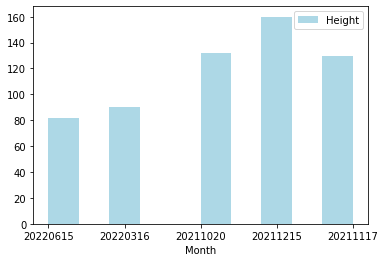

In [6]:
import matplotlib.pyplot as plt
plt.hist(option_df.Expiry_date, density=False, color = 'lightblue', cumulative = False, label = "Height")
plt.legend()
plt.xlabel('Month')
plt.show()

In [27]:
import calendar
c = calendar.Calendar(firstweekday=calendar.SUNDAY)
year = 2022; month = 6
monthcal = c.monthdatescalendar(year,month)
third_wed = [day for week in monthcal for day in week if \
                day.weekday() == calendar.WEDNESDAY and \
                day.month == month][2]
third_wed

datetime.date(2022, 6, 15)

In [37]:
from os import walk, path, mkdir
from os.path import join
import pandas as pd
import calendar
c = calendar.Calendar(firstweekday=calendar.SUNDAY)
option_df = pd.DataFrame(columns=['Code','Type','Execution_price','Expiry_date'])
for root,dirs,files in walk('/Users/lorraou/Code/Work/Option/Data'):
    for d in dirs:
        print(d)
        # if 'TXO' in f:
        #     code = f.split('.')[0]
        #     price = int(code[3:8])
        #     month = int(info_df.loc[code[8],'expiry_month'])
        #     tpe = info_df.loc[code[8],'type']
        #     year = int('202'+code[9])
        #     monthcal = c.monthdatescalendar(year,month)
        #     third_wed = [day for week in monthcal for day in week if day.weekday() == calendar.WEDNESDAY and day.month == month][2]
        #     exp_date = datetime.strftime(third_wed,'%Y%m%d')
        #     option_df = option_df.append({'Code':code,'Type':tpe,'Execution_price':price,'Expiry_date':exp_date},ignore_index=True)

20211006
20211008
20211007
20211005
.git
objects
info
logs
hooks
refs
pack
info
refs
heads
remotes
origin
heads
tags
remotes
origin
